In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys

from tqdm import tqdm
import pickle
import h5py

import numpy as np
from astropy.cosmology import Planck18
from astropy import units as u
from astropy import constants as const

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file('../matplotlibrc')

In [2]:
wdir = os.environ['DM21CM_DIR']
sys.path.append(wdir)
#sys.path.append(wdir + "/build_tf")
sys.path.append(os.environ['DH_DIR'])
data_dir = '/n/holyscratch01/iaifi_lab/yitians/dm21cm/DM21cm/data/tf/zf002/data'

In [3]:
from dm21cm.utils import load_h5_dict

In [4]:
abscs = load_h5_dict(data_dir + '/abscissas.h5')

In [5]:
with h5py.File(data_dir + "/phot_dep.h5", 'r') as hf:
    phot_dep_tf = hf['data'][()]
    axes = hf['axes'][()]

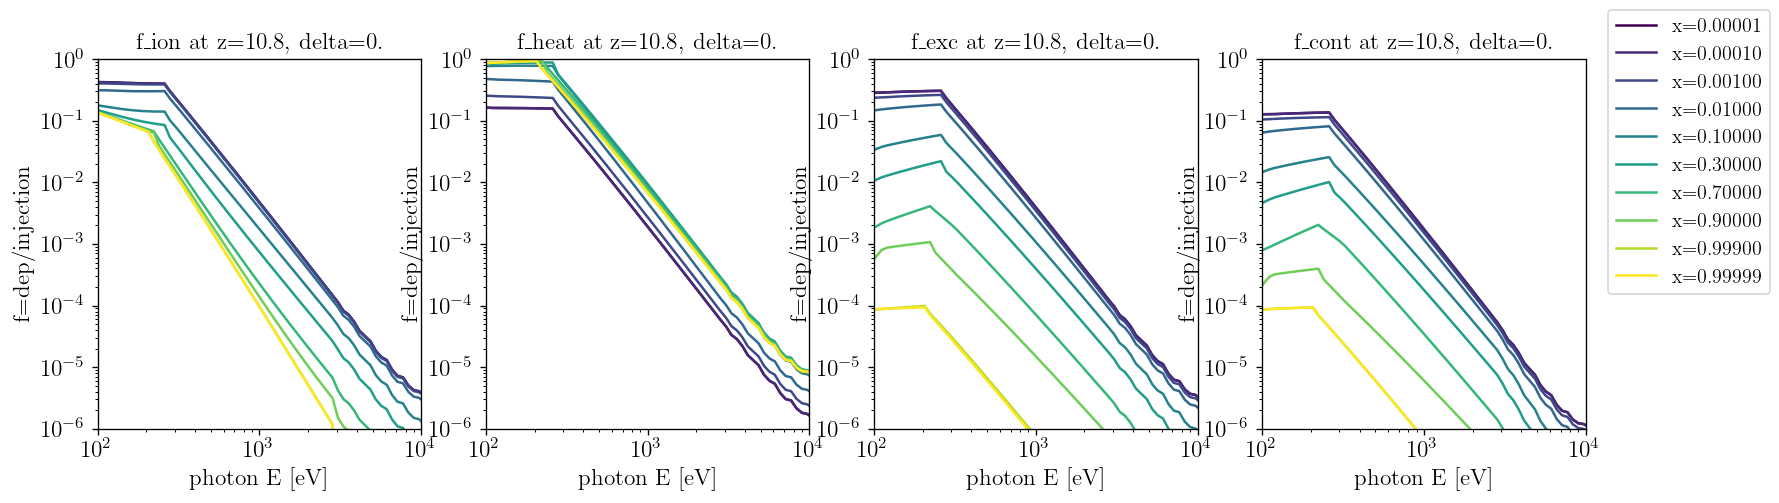

In [74]:
i_z = 3
i_n = 6

fig, axs = plt.subplots(1, 4, figsize=(16, 4))
ax = axs[0]
for i_x in range(10):
    x = abscs['x'][i_x]
    color = cms['viridis'](i_x/9)
    ax.plot(abscs['photE'], (phot_dep_tf[3, :, 6, i_x, 0] + phot_dep_tf[3, :, 6, i_x, 1])/abscs['photE'], label=f'x={x:.5f}', color=color)
ax.set(xscale='log', yscale='log')
ax.set(xlim=(1e2, 1e4), ylim=(1e-6, 1e0))
ax.set(xlabel='photon E [eV]', ylabel='f=dep/injection')
ax.set(title='f_ion at z=10.8, delta=0.')

ax = axs[1]
for i_x in range(10):
    x = abscs['x'][i_x]
    color = cms['viridis'](i_x/9)
    ax.plot(abscs['photE'], (phot_dep_tf[3, :, 6, i_x, 3])/abscs['photE'], color=color)
ax.set(xscale='log', yscale='log')
ax.set(xlim=(1e2, 1e4), ylim=(1e-6, 1e0))
ax.set(xlabel='photon E [eV]', ylabel='f=dep/injection')
ax.set(title='f_heat at z=10.8, delta=0.')

ax = axs[2]
for i_x in range(10):
    x = abscs['x'][i_x]
    color = cms['viridis'](i_x/9)
    ax.plot(abscs['photE'], (phot_dep_tf[3, :, 6, i_x, 2])/abscs['photE'], color=color)
ax.set(xscale='log', yscale='log')
ax.set(xlim=(1e2, 1e4), ylim=(1e-6, 1e0))
ax.set(xlabel='photon E [eV]', ylabel='f=dep/injection')
ax.set(title='f_exc at z=10.8, delta=0.')

ax = axs[3]
for i_x in range(10):
    x = abscs['x'][i_x]
    color = cms['viridis'](i_x/9)
    ax.plot(abscs['photE'], (phot_dep_tf[3, :, 6, i_x, 4])/abscs['photE'], color=color)
ax.set(xscale='log', yscale='log')
ax.set(xlim=(1e2, 1e4), ylim=(1e-6, 1e0))
ax.set(xlabel='photon E [eV]', ylabel='f=dep/injection')
ax.set(title='f_cont at z=10.8, delta=0.')
fig.legend()

In [6]:
# read 21cmfast tables
fn_s = [
    'xi_0.999.dat',
    'xi_0.990.dat',
    'xi_0.900.dat',
    'xi_0.500.dat',
    'log_xi_-1.0.dat',
    'log_xi_-1.3.dat',
    'log_xi_-1.6.dat',
    'log_xi_-2.0.dat',
    'log_xi_-2.3.dat',
    'log_xi_-2.6.dat',
    'log_xi_-3.0.dat',
    'log_xi_-3.3.dat',
    'log_xi_-3.6.dat',
    'log_xi_-4.0.dat',
][::-1]
x_s = np.concatenate([
    10**np.array([-4, -3.6, -3.3, -3, -2.6, -2.3, -2, -1.6, -1.3, -1]),
    [0.5, 0.9, 0.99, 0.999]
])

In [7]:
common_x_s = [0.0001, 0.001, 0.01, 0.1, 0.9, 0.999]
dc_i_x_s = [1, 2, 3, 4, 7,]
pc_i_x_s = [0, 3, 6, 9, 11,]

In [8]:
src_dir = "/n/home07/yitians/21cmfast/21cmFAST/src/py21cmfast/_data/x_int_tables"

In [9]:
f_s = []
for x, fn in zip(x_s, fn_s):
    f_s.append(np.loadtxt(f'{src_dir}/{fn}', skiprows=3))
f_s =np.array(f_s)

eng = f_s[0,:,0]

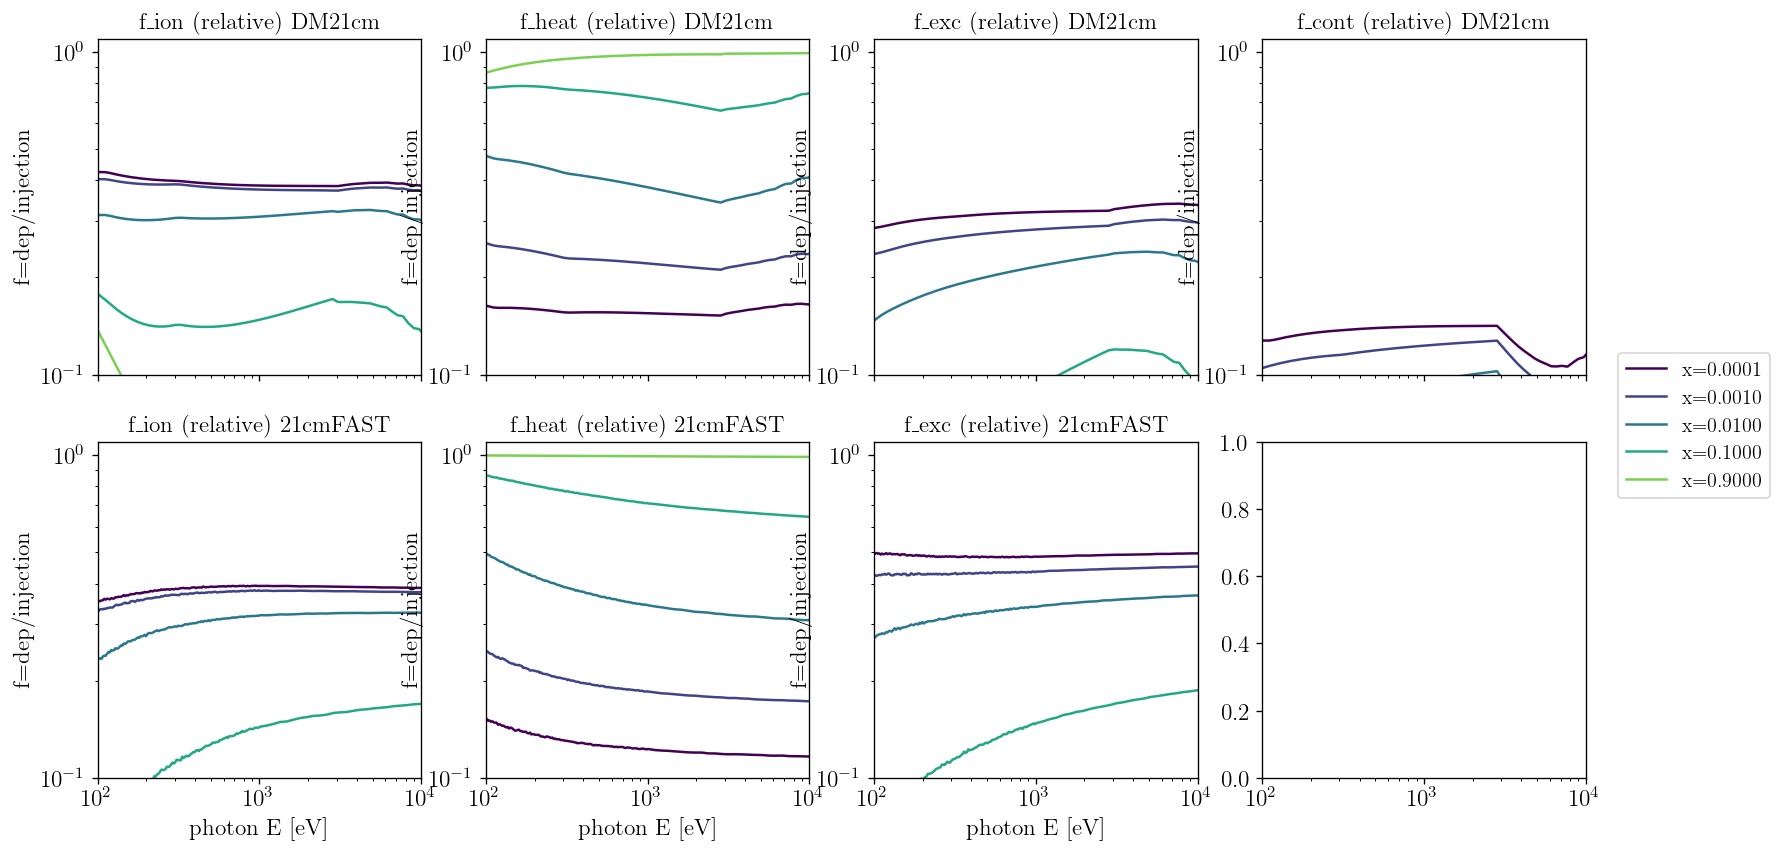

In [11]:
fig, axs = plt.subplots(2, 4, figsize=(16, 8), sharex='col')

ax = axs[0, 0]
for i_plot, dc_i_x in enumerate(dc_i_x_s):
    x = abscs['x'][dc_i_x]
    f_tot = np.sum(phot_dep_tf[3, :, 6, dc_i_x, :5], axis=-1)
    f_ion = np.sum(phot_dep_tf[3, :, 6, dc_i_x, :2], axis=-1)
    f_Heion = phot_dep_tf[3, :, 6, dc_i_x, 1]
    ax.plot(abscs['photE'], f_ion/f_tot, color=cms['viridis'](i_plot/5))
    #ax.plot(abscs['photE'], f_Heion/f_tot, color=cms['viridis'](i_plot/5), ls=':')
ax.set(xscale='log', yscale='log')
ax.set(xlim=(1e2, 1e4), ylim=(1e-1, 1.1e0))
ax.set(ylabel='f=dep/injection')
ax.set(title='f_ion (relative) DM21cm')

ax = axs[0, 1]
for i_plot, dc_i_x in enumerate(dc_i_x_s):
    x = abscs['x'][dc_i_x]
    f_tot = np.sum(phot_dep_tf[3, :, 6, dc_i_x, :5], axis=-1)
    f_ion = phot_dep_tf[3, :, 6, dc_i_x, 3]
    ax.plot(abscs['photE'], f_ion/f_tot, color=cms['viridis'](i_plot/5))
ax.set(xscale='log', yscale='log')
ax.set(xlim=(1e2, 1e4), ylim=(1e-1, 1.1e0))
ax.set(ylabel='f=dep/injection')
ax.set(title='f_heat (relative) DM21cm')

ax = axs[0, 2]
for i_plot, dc_i_x in enumerate(dc_i_x_s):
    x = abscs['x'][dc_i_x]
    f_tot = np.sum(phot_dep_tf[3, :, 6, dc_i_x, :5], axis=-1)
    f_exc = phot_dep_tf[3, :, 6, dc_i_x, 2]
    ax.plot(abscs['photE'], f_exc/f_tot, color=cms['viridis'](i_plot/5))
ax.set(xscale='log', yscale='log')
ax.set(xlim=(1e2, 1e4), ylim=(1e-1, 1.1e0))
ax.set(ylabel='f=dep/injection')
ax.set(title='f_exc (relative) DM21cm')

ax = axs[0, 3]
for i_plot, dc_i_x in enumerate(dc_i_x_s):
    x = abscs['x'][dc_i_x]
    f_tot = np.sum(phot_dep_tf[3, :, 6, dc_i_x, :5], axis=-1)
    f_cont = phot_dep_tf[3, :, 6, dc_i_x, 4]
    ax.plot(abscs['photE'], f_cont/f_tot, color=cms['viridis'](i_plot/5))
ax.set(xscale='log', yscale='log')
ax.set(xlim=(1e2, 1e4), ylim=(1e-1, 1.1e0))
ax.set(ylabel='f=dep/injection')
ax.set(title='f_cont (relative) DM21cm')

ax = axs[1, 0]
for i_plot, pc_i_x in enumerate(pc_i_x_s):
    x = x_s[pc_i_x]
    ax.plot(eng, f_s[pc_i_x, :, 1], label=f'x={x:.4f}', color=cms['viridis'](i_plot/5))
ax.set(xscale='log', yscale='log')
ax.set(xlim=(1e2, 1e4), ylim=(1e-1, 1.1e0))
ax.set(xlabel='photon E [eV]', ylabel='f=dep/injection')
ax.set(title='f_ion (relative) 21cmFAST')

ax = axs[1, 1]
for i_plot, pc_i_x in enumerate(pc_i_x_s):
    x = x_s[pc_i_x]
    ax.plot(eng, f_s[pc_i_x, :, 2], color=cms['viridis'](i_plot/5))
ax.set(xscale='log', yscale='log')
ax.set(xlim=(1e2, 1e4), ylim=(1e-1, 1.1e0))
ax.set(xlabel='photon E [eV]', ylabel='f=dep/injection')
ax.set(title='f_heat (relative) 21cmFAST')

ax = axs[1, 2]
for i_plot, pc_i_x in enumerate(pc_i_x_s):
    x = x_s[pc_i_x]
    ax.plot(eng, f_s[pc_i_x, :, 3], color=cms['viridis'](i_plot/5))
ax.set(xscale='log', yscale='log')
ax.set(xlim=(1e2, 1e4), ylim=(1e-1, 1.1e0))
ax.set(xlabel='photon E [eV]', ylabel='f=dep/injection')
ax.set(title='f_exc (relative) 21cmFAST')
fig.legend(loc='right')